In [21]:
import os
import ast
!pip install wfdb
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install keras
import tensorflow.keras as keras

sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/ptb-xl-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19338_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19339_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19339_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19340_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19340_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19341_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19341_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19342_hr.dat  
  inflating: ptb-xl-a-large-publicly-availabl

In [22]:
PATH_TO_DATA = "/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1"

ECG_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709,56.0,1,NaN,63.0,2,0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243,19.0,0,NaN,70.0,2,0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372,37.0,1,NaN,69.0,2,0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014,24.0,0,NaN,82.0,2,0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448,19.0,1,NaN,70.0,2,0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180,67.0,1,NaN,NaN,1,2,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703,93.0,0,NaN,NaN,1,2,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311,59.0,1,NaN,NaN,1,2,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [23]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)
                    
ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)

In [24]:
def diagnostic_subclass(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_subclass)
    return list(res)
                    
ECG_df['diagnostic_subclass'] = ECG_df.scp_codes.apply(diagnostic_subclass)

In [25]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 100

ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

ECG_data.shape

(21837, 1000, 12)

In [ ]:
sample = ECG_data[0]
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(20,10))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
# plt.tight_layout()
plt.show()

In [ ]:
import missingno as msno

msno.matrix(ECG_df)
plt.show()

In [ ]:
sns.heatmap(ECG_df[['age', 'sex', 'height', 'weight',
       'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker']].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [ ]:
ECG_df[[col for col in ECG_df.columns if col not in ('scp_codes', 'diagnostic_subclass')]].nunique(dropna=True)

In [ ]:
ECG_df.columns.tolist()

In [ ]:
ECG_df[[col for col in ECG_df.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

In [ ]:
ECG_df.duplicated()

In [26]:
X = pd.DataFrame(index=ECG_df.index)

X['age'] = ECG_df.age
X.age.fillna(0, inplace=True)

X['sex'] = ECG_df.sex.astype(float)
X.sex.fillna(0, inplace=True)

X['height'] = ECG_df.height
X.loc[X.height < 50, 'height'] = np.nan
X.height.fillna(0, inplace=True)

X['weight'] = ECG_df.weight
X.weight.fillna(0, inplace=True)

X['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

X['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

X

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker
ecg_id,,,,,,,
1,56.0,1.0,0.0,63.0,0.0,0.0,0.0
2,19.0,0.0,0.0,70.0,0.0,0.0,0.0
3,37.0,1.0,0.0,69.0,0.0,0.0,0.0
4,24.0,0.0,0.0,82.0,0.0,0.0,0.0
5,19.0,1.0,0.0,70.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,67.0,1.0,0.0,0.0,0.0,0.0,0.0
21834,93.0,0.0,0.0,0.0,4.0,0.0,0.0
21835,59.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sns.heatmap(X [['age', 'sex', 'height', 'weight',
       'infarction_stadium1', 'infarction_stadium2',  'pacemaker']].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [27]:
Z = pd.DataFrame(0, index=ECG_df.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in ECG_df.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [ ]:
#import itertools
#ECG_df["scp_classes"].tolist()
#index=ECG_df.index, columns=list(dict.fromkeys(list(itertools.chain.from_iterable(ECG_df["scp_classes"].tolist()))))
ECG_df["diagnostic_subclass"].tolist()

In [11]:
import itertools
Z2 = pd.DataFrame(0, index=ECG_df.index, columns=list(dict.fromkeys(list(itertools.chain.from_iterable(ECG_df["diagnostic_subclass"].tolist())))), dtype='int')
for i in Z2.index:
    for k in ECG_df.loc[i].diagnostic_subclass:
        Z2.loc[i, k] = 1

Z2

,NORM,IMI,STTC,NST_,LVH,LAFB/LPFB,RVH,IRBBB,RAO/RAE,IVCD,...,ISCA,ISC_,SEHYP,ISCI,CRBBB,CLBBB,LAO/LAE,ILBBB,WPW,PMI
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21834,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21835,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
ECG_data[X[ECG_df.strat_fold <= 8].index-1]

In [ ]:
ECG_data[X[ECG_df.strat_fold <= 8].index]

In [ ]:
X[ECG_df.strat_fold <= 8]

In [31]:
X_train, Y_train, Z_train = X[ECG_df.strat_fold <= 8],  ECG_data[X[ECG_df.strat_fold <= 8].index - 1],  Z[ECG_df.strat_fold <= 8]
X_valid, Y_valid, Z_valid = X[ECG_df.strat_fold == 9],  ECG_data[X[ECG_df.strat_fold == 9].index - 1],  Z[ECG_df.strat_fold == 9]
X_test,  Y_test,  Z_test  = X[ECG_df.strat_fold == 10], ECG_data[X[ECG_df.strat_fold == 10].index - 1], Z[ECG_df.strat_fold == 10]

print(X_train.shape, Y_train.shape, Z_train.shape)
print(X_valid.shape, Y_valid.shape, Z_valid.shape)
print(X_test.shape,  Y_test.shape,  Z_test.shape)

(17441, 7) (17441, 1000, 12) (17441, 5)
(2193, 7) (2193, 1000, 12) (2193, 5)
(2203, 7) (2203, 1000, 12) (2203, 5)


In [32]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(X_scaler.transform(X_valid), columns=X_valid.columns)
X_test  = pd.DataFrame(X_scaler.transform(X_test),  columns=X_test.columns)

In [ ]:
X_train

In [33]:
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_valid = Y_scaler.transform(Y_valid.reshape(-1, Y_valid.shape[-1])).reshape(Y_valid.shape)
Y_test  = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

In [ ]:
# NUMPY_DATA_FILE = 'D:\\My Reserch Project\\data.npz'

# save_args = {
#     'X_train': X_train.to_numpy().astype('float32'),
#     'X_valid': X_valid.to_numpy().astype('float32'),
#     'X_test':  X_test.to_numpy().astype('float32'),
#     'Y_train': Y_train.astype('float32'), 
#     'Y_valid': Y_valid.astype('float32'),
#     'Y_test':  Y_test.astype('float32'),
#     'Z_train': Z_train.to_numpy().astype('float32'), 
#     'Z_valid': Z_valid.to_numpy().astype('float32'),
#     'Z_test':  Z_test.to_numpy().astype('float32'),
# }
# np.savez(NUMPY_DATA_FILE, **save_args)

In [ ]:
import sys
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
from google.colab import files

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

sns.set_style('darkgrid')

In [ ]:
# from google.colab import drive
# import numpy as np
# drive.mount('/content/drive')
# #data = np.load('/content/drive/My Drive/Colab Notebooks/project/data/dat.npz')

In [ ]:
# NUMPY_DATA_FILE = '/content/drive/My Drive/data.npz'

# thismodule = sys.modules[__name__]

# with np.load(NUMPY_DATA_FILE) as data:
#     for k in data.keys():
#         setattr(thismodule, k, data[k].astype(float))

In [ ]:
# z1 = np.zeros(Z_test.shape)
# z1[:, 0] = 1

# m = keras.metrics.BinaryAccuracy()
# m.update_state(Z_test, z1)
# m.result()

In [ ]:
# z_prob = Z_train.sum(axis=0) / Z_train.shape[0]
# z2 = np.random.uniform(size=Z_test.shape)

# for i in range(z2.shape[-1]):
#     z2[:, i] = (z2[:, i] < z_prob[i]).astype('float64')
    
# m = keras.metrics.BinaryAccuracy()
# m.update_state(Z_test, z2)
# m.result()

using only x

In [14]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu', name='X_dense_1')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_1')(X)
    X = keras.layers.Dense(units, activation='relu', name='X_dense_2')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_2')(X)
    
    return X

In [15]:
def create_model_sup_x(X_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:], name='X_inputs')

    X = create_X_model(X_inputs)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)

    model = keras.Model(inputs=X_inputs, outputs=outputs, name='model01')
    return model

In [16]:
model01 = create_model_sup_x(X_train.shape, Z_train.shape)
model01.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model01.summary()

Model: "model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X_inputs (InputLayer)       [(None, 7)]               0         
                                                                 
 X_dense_1 (Dense)           (None, 32)                256       
                                                                 
 X_drop_1 (Dropout)          (None, 32)                0         
                                                                 
 X_dense_2 (Dense)           (None, 32)                1056      
                                                                 
 X_drop_2 (Dropout)          (None, 32)                0         
                                                                 
 Z_dense_1 (Dense)           (None, 64)                2112      
                                                                 
 Z_dense_2 (Dense)           (None, 64)                4160

In [17]:
MODEL_CHECKPOINT = '/content/drive/MyDrive/project/modelsux.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model01.fit(X_train, Z_train, epochs=40, batch_size=32, callbacks=callbacks_list, validation_data=(X_valid, Z_valid))

model01 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/40
546/546 [==============================] - 12s 9ms/step - loss: 0.5067 - binary_accuracy: 0.7751 - precision: 0.6566 - recall: 0.2461 - val_loss: 0.4704 - val_binary_accuracy: 0.7930 - val_precision: 0.7288 - val_recall: 0.3029
Epoch 2/40
546/546 [==============================] - 3s 5ms/step - loss: 0.4785 - binary_accuracy: 0.7916 - precision: 0.7446 - recall: 0.2774 - val_loss: 0.4690 - val_binary_accuracy: 0.7915 - val_precision: 0.7076 - val_recall: 0.3143
Epoch 3/40
546/546 [==============================] - 3s 6ms/step - loss: 0.4750 - binary_accuracy: 0.7924 - precision: 0.7434 - recall: 0.2832 - val_loss: 0.4692 - val_binary_accuracy: 0.7919 - val_precision: 0.7113 - val_recall: 0.3129
Epoch 4/40
546/546 [==============================] - 3s 6ms/step - loss: 0.4724 - binary_accuracy: 0.7941 - precision: 0.7511 - recall: 0.2870 - val_loss: 0.4675 - val_binary_accuracy: 0.7930 - val_precision: 0.7241 - val_recall: 0.3072
Epoch 5/40
546/546 [===========================

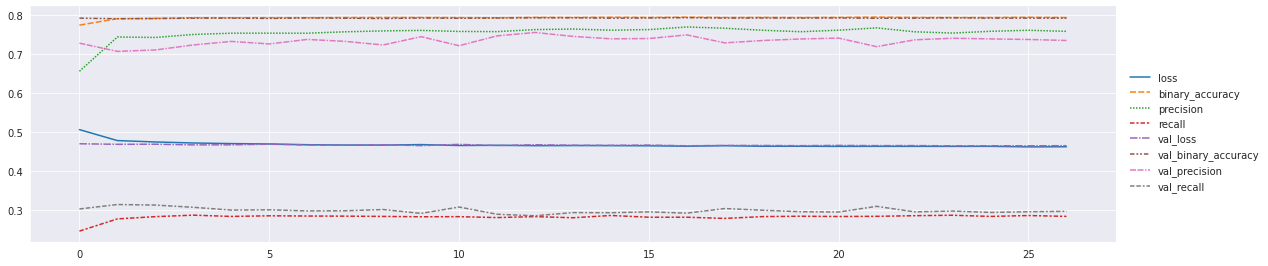

In [18]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

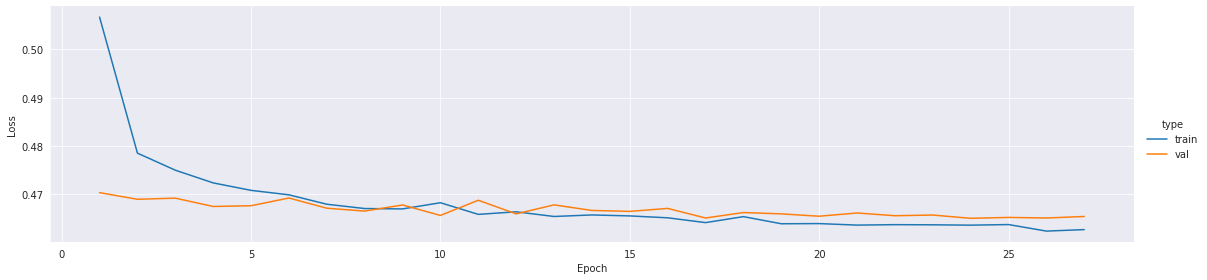

In [19]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

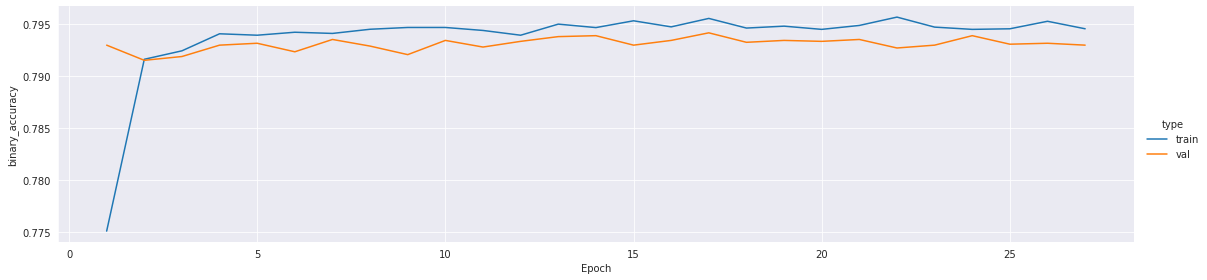

In [20]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot
plt.show()

In [21]:
model01.evaluate(X_test, Z_test)

69/69 [==============================] - 1s 3ms/step - loss: 0.4603 - binary_accuracy: 0.7968 - precision: 0.7684 - recall: 0.2878


[0.4603269696235657,
 0.7968225479125977,
 0.7683508396148682,
 0.2877543866634369]

**new model for x**

In [ ]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu')(X)
    X = keras.layers.Dropout(dropouts)(X)
    X = keras.layers.Dense(units, activation='relu')(X)
    X = keras.layers.Dropout(dropouts)(X)
    
    return X

In [ ]:
def create_model01(X_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:])

    X = create_X_model(X_inputs)
    X = keras.layers.Dense(64, activation='relu')(X)
    X = keras.layers.Dense(64, activation='relu')(X)
    X = keras.layers.Dropout(0.5)(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='softmax')(X)

    model = keras.Model(inputs=X_inputs, outputs=outputs, name='model01')
    return model

In [ ]:
model01x = create_model01(X_train.shape, Z_train.shape)
model01x.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model01x.summary()

In [ ]:
MODEL_CHECKPOINT = '/content/drive/MyDrive/kagalle'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_accuracy', save_best_only=True)
]

history = model01x.fit(X_train, Z_train, epochs=40, batch_size=32, callbacks=callbacks_list, validation_data=(X_valid, Z_valid))

model01x = keras.models.load_model(MODEL_CHECKPOINT)

In [ ]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

In [ ]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

In [ ]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot

In [ ]:
model01x.evaluate(X_test, Z_test)

In [ ]:
using only x

using only y

In [22]:
def create_Y_model(X, *, filters=(32, 64, 128), kernel_size=(5, 3, 3), strides=(1, 1, 1)):
    
    f1, f2, f3 = filters
    k1, k2, k3 = kernel_size
    s1, s2, s3 = strides
    
    X = keras.layers.Conv1D(f1, k1, strides=s1, padding='same', name='Y_conv_1')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_1')(X)
    X = keras.layers.ReLU(name='Y_relu_1')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_1')(X)

    X = keras.layers.Conv1D(f2, k2, strides=s2, padding='same', name='Y_conv_2')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_2')(X)
    X = keras.layers.ReLU(name='Y_relu_2')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_2')(X)

    X = keras.layers.Conv1D(f3, k3, strides=s3, padding='same', name='Y_conv_3')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_3')(X)
    X = keras.layers.ReLU(name='Y_relu_3')(X)

    X = keras.layers.GlobalAveragePooling1D(name='Y_aver')(X)
    X = keras.layers.Dropout(0.5, name='Y_drop')(X)

    return X

In [ ]:
Z_train.shape[-1]

In [23]:
def create_model_sup_y(Y_shape, Z_shape):
    Y_inputs = keras.Input(Y_shape[1:], name='Y_inputs')

    X = create_Y_model(Y_inputs)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)
    
    model = keras.Model(inputs=Y_inputs, outputs=outputs, name='model01')
    return model

In [25]:
model02 = create_model_sup_y(Y_train.shape, Z_train.shape)
model02.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model02.summary()

Model: "model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Y_inputs (InputLayer)       [(None, 1000, 12)]        0         
                                                                 
 Y_conv_1 (Conv1D)           (None, 1000, 32)          1952      
                                                                 
 Y_norm_1 (BatchNormalizatio  (None, 1000, 32)         128       
 n)                                                              
                                                                 
 Y_relu_1 (ReLU)             (None, 1000, 32)          0         
                                                                 
 Y_pool_1 (MaxPooling1D)     (None, 500, 32)           0         
                                                                 
 Y_conv_2 (Conv1D)           (None, 500, 64)           6208      
                                                           

In [26]:
MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model02.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model02.fit(Y_train, Z_train, epochs=40, batch_size=32, callbacks=callbacks_list, validation_data=(Y_valid, Z_valid))

model02 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/40
546/546 [==============================] - 20s 17ms/step - loss: 0.4535 - binary_accuracy: 0.7921 - precision: 0.6359 - recall: 0.4312 - val_loss: 0.3734 - val_binary_accuracy: 0.8422 - val_precision: 0.7360 - val_recall: 0.5969
Epoch 2/40
546/546 [==============================] - 6s 11ms/step - loss: 0.3890 - binary_accuracy: 0.8322 - precision: 0.7188 - recall: 0.5613 - val_loss: 0.3515 - val_binary_accuracy: 0.8469 - val_precision: 0.7465 - val_recall: 0.6072
Epoch 3/40
546/546 [==============================] - 8s 14ms/step - loss: 0.3649 - binary_accuracy: 0.8469 - precision: 0.7486 - recall: 0.6011 - val_loss: 0.3658 - val_binary_accuracy: 0.8466 - val_precision: 0.7521 - val_recall: 0.5965
Epoch 4/40
546/546 [==============================] - 7s 13ms/step - loss: 0.3500 - binary_accuracy: 0.8544 - precision: 0.7665 - recall: 0.6166 - val_loss: 0.3344 - val_binary_accuracy: 0.8610 - val_precision: 0.7641 - val_recall: 0.6600
Epoch 5/40
546/546 [=======================

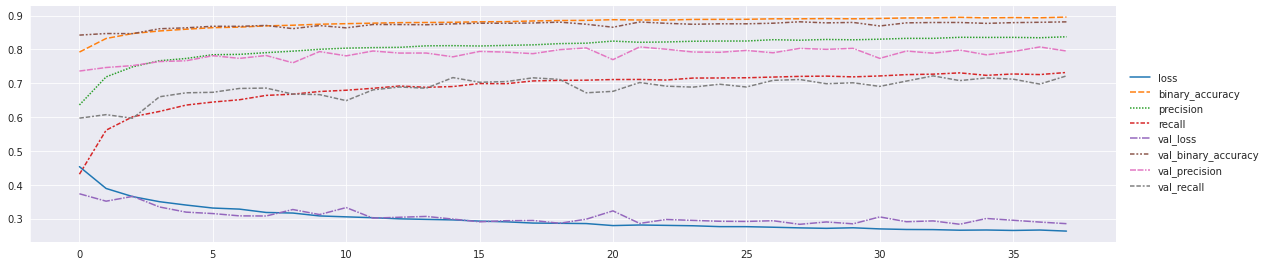

In [27]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

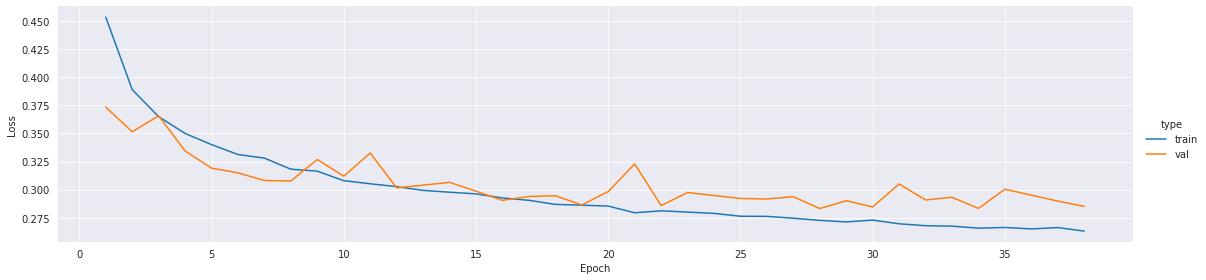

In [28]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

Text(23.57933756510417, 0.5, 'binary_accuracy')

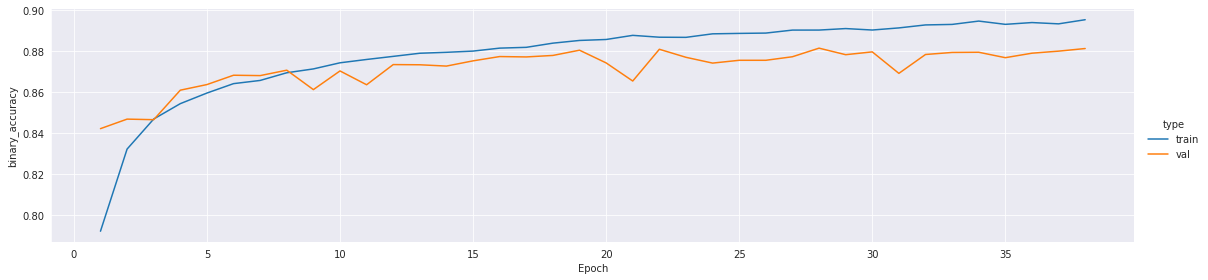

In [29]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot

In [32]:
model02.evaluate(Y_test, Z_test)

69/69 [==============================] - 1s 12ms/step - loss: 0.2896 - binary_accuracy: 0.8811 - precision: 0.8000 - recall: 0.7097


[0.28957125544548035,
 0.8810713291168213,
 0.800000011920929,
 0.7097465395927429]

# X and Y: 1D CNN Classifier

In [33]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu', name='X_dense_1')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_1')(X)
    X = keras.layers.Dense(units, activation='relu', name='X_dense_2')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_2')(X)
    
    return X

In [34]:
def create_Y_model(X, *, filters=(32, 64, 128), kernel_size=(5, 3, 3), strides=(1, 1, 1)):
    
    f1, f2, f3 = filters
    k1, k2, k3 = kernel_size
    s1, s2, s3 = strides
    
    X = keras.layers.Conv1D(f1, k1, strides=s1, padding='same', name='Y_conv_1')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_1')(X)
    X = keras.layers.ReLU(name='Y_relu_1')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_1')(X)

    X = keras.layers.Conv1D(f2, k2, strides=s2, padding='same', name='Y_conv_2')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_2')(X)
    X = keras.layers.ReLU(name='Y_relu_2')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_2')(X)

    X = keras.layers.Conv1D(f3, k3, strides=s3, padding='same', name='Y_conv_3')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_3')(X)
    X = keras.layers.ReLU(name='Y_relu_3')(X)

    X = keras.layers.GlobalAveragePooling1D(name='Y_aver')(X)
    X = keras.layers.Dropout(0.5, name='Y_drop')(X)

    return X

In [35]:
def create_model_sup(X_shape, Y_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:], name='X_inputs')
    Y_inputs = keras.Input(Y_shape[1:], name='Y_inputs')

    X = keras.layers.Concatenate(name='Z_concat')([create_X_model(X_inputs), create_Y_model(Y_inputs, filters=(64, 128, 256), kernel_size=(7, 3, 3))])
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)

    model = keras.Model(inputs=[X_inputs, Y_inputs], outputs=outputs, name='model02')
    return model

In [36]:
model03 = create_model_sup(X_train.shape, Y_train.shape, Z_train.shape)
model03.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model03.summary()

Model: "model02"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Y_inputs (InputLayer)          [(None, 1000, 12)]   0           []                               
                                                                                                  
 Y_conv_1 (Conv1D)              (None, 1000, 64)     5440        ['Y_inputs[0][0]']               
                                                                                                  
 Y_norm_1 (BatchNormalization)  (None, 1000, 64)     256         ['Y_conv_1[0][0]']               
                                                                                                  
 Y_relu_1 (ReLU)                (None, 1000, 64)     0           ['Y_norm_1[0][0]']               
                                                                                            

In [37]:

MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model03.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=20),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model03.fit([X_train, Y_train], Z_train, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data=([X_valid, Y_valid], Z_valid))

model03 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/100
546/546 [==============================] - 17s 17ms/step - loss: 0.4180 - binary_accuracy: 0.8134 - precision: 0.6818 - recall: 0.5023 - val_loss: 0.3327 - val_binary_accuracy: 0.8612 - val_precision: 0.7755 - val_recall: 0.6432
Epoch 2/100
546/546 [==============================] - 10s 19ms/step - loss: 0.3431 - binary_accuracy: 0.8583 - precision: 0.7695 - recall: 0.6341 - val_loss: 0.3126 - val_binary_accuracy: 0.8736 - val_precision: 0.7963 - val_recall: 0.6793
Epoch 3/100
546/546 [==============================] - 11s 20ms/step - loss: 0.3257 - binary_accuracy: 0.8683 - precision: 0.7892 - recall: 0.6594 - val_loss: 0.3132 - val_binary_accuracy: 0.8670 - val_precision: 0.7951 - val_recall: 0.6465
Epoch 4/100
546/546 [==============================] - 9s 17ms/step - loss: 0.3127 - binary_accuracy: 0.8755 - precision: 0.8038 - recall: 0.6763 - val_loss: 0.3140 - val_binary_accuracy: 0.8742 - val_precision: 0.7945 - val_recall: 0.6853
Epoch 5/100
546/546 [================

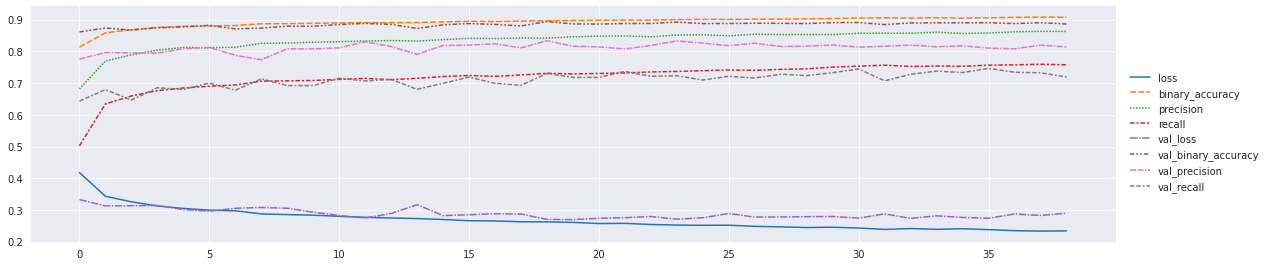

In [38]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

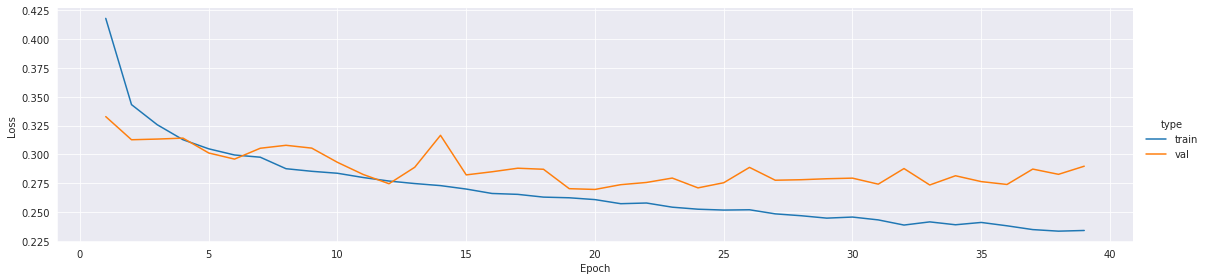

In [39]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

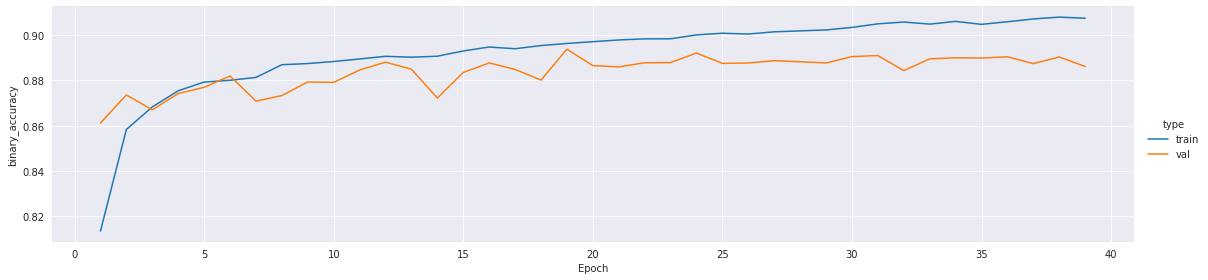

In [40]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot
plt.show()

In [42]:
model03.evaluate([X_test, Y_test], Z_test)

69/69 [==============================] - 3s 17ms/step - loss: 0.2670 - binary_accuracy: 0.8924 - precision: 0.8290 - recall: 0.7269


[0.2670326828956604,
 0.8924194574356079,
 0.8289902210235596,
 0.7268832325935364]

In [44]:
model01 = keras.models.load_model('/content/drive/MyDrive/project/modelsux.keras')
model02 = keras.models.load_model('/content/drive/MyDrive/project/model02.keras')
model03 = keras.models.load_model('/content/drive/MyDrive/project/model03.keras')

labels=['NORM', 'MI', 'STTC', 'CD', 'HYP']

Z_test = Z_test.astype(int)
Z_pred_01 = model01.predict(X_test).round().astype(int)
Z_pred_02 = model02.predict (Y_test).round().astype(int)
Z_pred_03 = model03.predict([X_test, Y_test]).round().astype(int)

69/69 [==============================] - 1s 6ms/step


In [46]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Class - " + class_label)

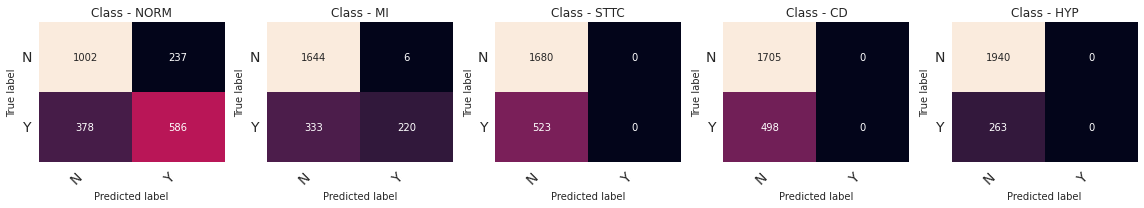

              precision    recall  f1-score   support

        NORM       0.71      0.61      0.66       964
          MI       0.97      0.40      0.56       553
        STTC       0.00      0.00      0.00       523
          CD       0.00      0.00      0.00       498
         HYP       0.00      0.00      0.00       263

   micro avg       0.77      0.29      0.42      2801
   macro avg       0.34      0.20      0.24      2801
weighted avg       0.44      0.29      0.34      2801
 samples avg       0.37      0.33      0.34      2801



In [47]:
import sklearn.metrics
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z_test, Z_pred_01), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z_test, Z_pred_01, target_names=labels, zero_division=0))

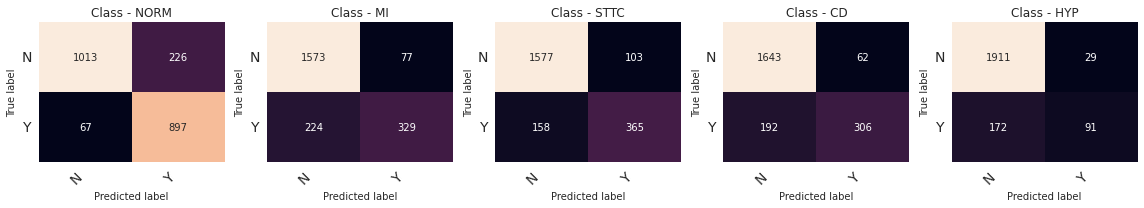

              precision    recall  f1-score   support

        NORM       0.80      0.93      0.86       964
          MI       0.81      0.59      0.69       553
        STTC       0.78      0.70      0.74       523
          CD       0.83      0.61      0.71       498
         HYP       0.76      0.35      0.48       263

   micro avg       0.80      0.71      0.75      2801
   macro avg       0.80      0.64      0.69      2801
weighted avg       0.80      0.71      0.74      2801
 samples avg       0.77      0.73      0.74      2801



In [49]:
import sklearn.metrics
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z_test, Z_pred_02), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z_test, Z_pred_02, target_names=labels, zero_division=0))

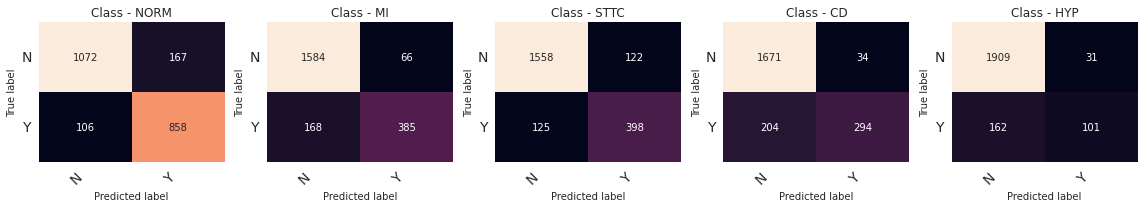

              precision    recall  f1-score   support

        NORM       0.84      0.89      0.86       964
          MI       0.85      0.70      0.77       553
        STTC       0.77      0.76      0.76       523
          CD       0.90      0.59      0.71       498
         HYP       0.77      0.38      0.51       263

   micro avg       0.83      0.73      0.77      2801
   macro avg       0.82      0.66      0.72      2801
weighted avg       0.83      0.73      0.77      2801
 samples avg       0.78      0.74      0.75      2801



In [51]:
import sklearn.metrics
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z_test, Z_pred_03), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z_test, Z_pred_03, target_names=labels, zero_division=0))

In [ ]:
X_train.shape[1:]

In [ ]:
Y_train.shape[1:]

In [ ]:
X_train.shape

my CNN model

In [35]:
from tensorflow import keras

# Define the first model with x_train as input and z_train as response
def create_x_model(x_shape, z_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=x_shape[1:]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(z_shape[-1], activation='sigmoid')
    ])
    return model

# Define the second model with y_train as input and z_train as response
def create_y_model(y_shape, z_shape):
    model = keras.Sequential([
        keras.layers.LSTM(units=64, return_sequences=True, input_shape=y_shape[1:]),
        keras.layers.LSTM(units=32),
        keras.layers.Dense(z_shape[-1], activation='sigmoid')
    ])
    return model

# Define the input shapes for x_train, y_train and z_train
x_train_shape = (X_train.shape)
y_train_shape = (Y_train.shape)
z_train_shape = (Z_train.shape)

# Create the first model with x_train as input and z_train as response
model_x = create_x_model(x_train_shape, z_train_shape)

# Create the second model with y_train as input and z_train as response
model_y = create_y_model(y_train_shape, z_train_shape)

# Concatenate the two models
combined_output = keras.layers.concatenate([model_x.output, model_y.output])
combined_output = keras.layers.Dropout(0.5)(combined_output)
combined_output = keras.layers.Dense(32, activation='relu')(combined_output)
combined_output = keras.layers.Dropout(0.5)(combined_output)
combined_output = keras.layers.Dense(z_train_shape[-1], activation='sigmoid')(combined_output)
combined_model = keras.models.Model(inputs=[model_x.input, model_y.input], outputs=combined_output)





In [36]:
# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_input (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 lstm_input (InputLayer)        [(None, 1000, 12)]   0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           512         ['dense_input[0][0]']            
                                                                                                  
 lstm (LSTM)                    (None, 1000, 64)     19712       ['lstm_input[0][0]']             
                                                                                              

In [ ]:

# Train the model


In [ ]:

MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model07.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_accuracy', save_best_only=True)
]

history = combined_model.fit([X_train, Y_train], Z_train, epochs=100, batch_size=32, validation_split=0.2)

#model07 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/100
436/436 [==============================] - 38s 63ms/step - loss: 0.5627 - accuracy: 0.4012 - val_loss: 0.5323 - val_accuracy: 0.3952
Epoch 2/100
436/436 [==============================] - 26s 59ms/step - loss: 0.5107 - accuracy: 0.4860 - val_loss: 0.5221 - val_accuracy: 0.5136
Epoch 3/100
436/436 [==============================] - 24s 54ms/step - loss: 0.5006 - accuracy: 0.5233 - val_loss: 0.5177 - val_accuracy: 0.5185
Epoch 4/100
436/436 [==============================] - 25s 57ms/step - loss: 0.4975 - accuracy: 0.5333 - val_loss: 0.5165 - val_accuracy: 0.5150
Epoch 5/100
436/436 [==============================] - 26s 60ms/step - loss: 0.4951 - accuracy: 0.5371 - val_loss: 0.5152 - val_accuracy: 0.5099
Epoch 6/100
436/436 [==============================] - 24s 56ms/step - loss: 0.4919 - accuracy: 0.5451 - val_loss: 0.5108 - val_accuracy: 0.5182
Epoch 7/100
436/436 [==============================] - 25s 56ms/step - loss: 0.4839 - accuracy: 0.5497 - val_loss: 0.5000 - val_ac

In [121]:
combined_model.save("/content/drive/MyDrive/project/model07.keras")

In [42]:
model07 = keras.models.load_model("/content/drive/MyDrive/project")

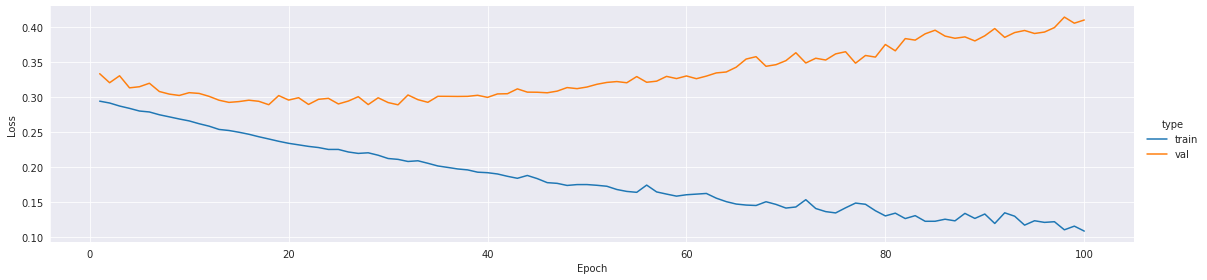

In [112]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

Text(23.914352756076397, 0.5, 'accuracy')

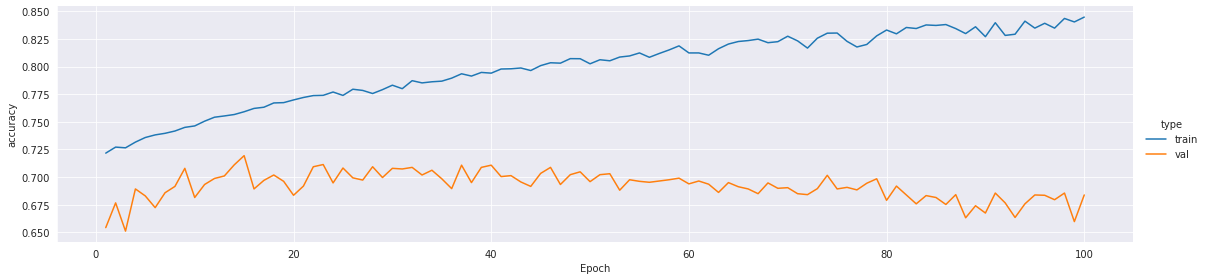

In [115]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['accuracy'], columns=['accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_accuracy'], columns=['accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('accuracy')

# Display the plot

In [43]:
model07.evaluate([X_test, Y_test], Z_test)

69/69 [==============================] - 19s 252ms/step - loss: 0.4676 - accuracy: 0.6872


[0.4676345884799957, 0.6872446537017822]

In [44]:
# model01 = keras.models.load_model('/content/drive/MyDrive/project/modelsux.keras')
# model02 = keras.models.load_model('/content/drive/MyDrive/project/model02.keras')
# model03 = keras.models.load_model('/content/drive/MyDrive/project/model03.keras')

labels=['NORM', 'MI', 'STTC', 'CD', 'HYP']

Z_test = Z_test.astype(int)

Z_pred_07 = model07.predict([X_test, Y_test]).round().astype(int)

69/69 [==============================] - 18s 240ms/step


In [45]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Class - " + class_label)

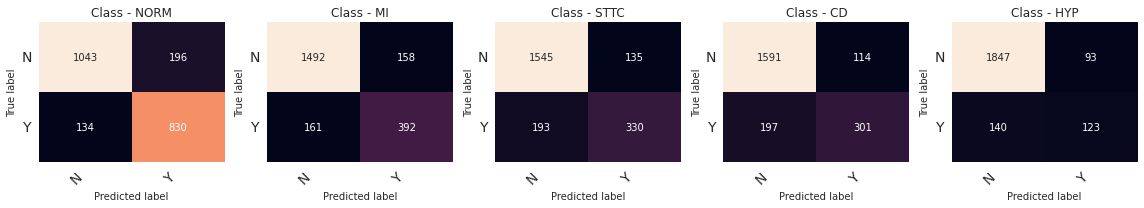

              precision    recall  f1-score   support

        NORM       0.81      0.86      0.83       964
          MI       0.71      0.71      0.71       553
        STTC       0.71      0.63      0.67       523
          CD       0.73      0.60      0.66       498
         HYP       0.57      0.47      0.51       263

   micro avg       0.74      0.71      0.72      2801
   macro avg       0.71      0.65      0.68      2801
weighted avg       0.73      0.71      0.72      2801
 samples avg       0.73      0.72      0.71      2801



In [46]:
import sklearn.metrics
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z_test, Z_pred_07), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z_test, Z_pred_07, target_names=labels, zero_division=0))

In [113]:
from tensorflow import keras

# Define the first model with x_train as input and z_train as response
def create_x_model(x_shape, z_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=x_shape[1:]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(z_shape[-1], activation='softmax')
    ])
    return model

# Define the second model with y_train as input and z_train as response
def create_y_model(y_shape, z_shape):
    model = keras.Sequential([
        keras.layers.LSTM(units=64, return_sequences=True, input_shape=y_shape[1:]),
        keras.layers.LSTM(units=32),
        keras.layers.Dense(z_shape[-1], activation='softmax')
    ])
    return model

# Define the input shapes for x_train, y_train and z_train
x_train_shape = (X_train.shape)
y_train_shape = (Y_train.shape)
z_train_shape = (Z_train.shape)

# Create the first model with x_train as input and z_train as response
model_x = create_x_model(x_train_shape, z_train_shape)

# Create the second model with y_train as input and z_train as response
model_y = create_y_model(y_train_shape, z_train_shape)

# Concatenate the two models
combined_output = keras.layers.concatenate([model_x.output, model_y.output])
combined_output = keras.layers.Dense(32, activation='relu')(combined_output)
combined_output = keras.layers.Dense(z_train_shape[-1], activation='softmax')(combined_output)
combined_model = keras.models.Model(inputs=[model_x.input, model_y.input], outputs=combined_output)

In [ ]:
# Compile the model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
combined_model.fit([X_train, Y_train], Z_train, epochs=10, batch_size=32, validation_split=0.2)

***sub classa 1D cnn model***

In [52]:
import itertools
Z2 = pd.DataFrame(0, index=ECG_df.index, columns=list(dict.fromkeys(list(itertools.chain.from_iterable(ECG_df["diagnostic_subclass"].tolist())))), dtype='int')
for i in Z2.index:
    for k in ECG_df.loc[i].diagnostic_subclass:
        Z2.loc[i, k] = 1

Z2

,NORM,IMI,STTC,NST_,LVH,LAFB/LPFB,RAO/RAE,RVH,IRBBB,IVCD,...,_AVB,ISC_,SEHYP,ISCI,CRBBB,CLBBB,LAO/LAE,ILBBB,WPW,PMI
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21834,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
list(dict.fromkeys(list(itertools.chain.from_iterable(ECG_df["diagnostic_subclass"].tolist()))))

['NORM',
 'IMI',
 'STTC',
 'NST_',
 'LVH',
 'LAFB/LPFB',
 'RAO/RAE',
 'RVH',
 'IRBBB',
 'IVCD',
 'LMI',
 'AMI',
 'ISCA',
 '_AVB',
 'ISC_',
 'SEHYP',
 'ISCI',
 'CRBBB',
 'CLBBB',
 'LAO/LAE',
 'ILBBB',
 'WPW',
 'PMI']

In [13]:
X_train, Y_train, Z2_train = X[ECG_df.strat_fold <= 8],  ECG_data[X[ECG_df.strat_fold <= 8].index - 1],  Z2[ECG_df.strat_fold <= 8]
X_valid, Y_valid, Z2_valid = X[ECG_df.strat_fold == 9],  ECG_data[X[ECG_df.strat_fold == 9].index - 1],  Z2[ECG_df.strat_fold == 9]
X_test,  Y_test,  Z2_test  = X[ECG_df.strat_fold == 10], ECG_data[X[ECG_df.strat_fold == 10].index - 1], Z2[ECG_df.strat_fold == 10]

print(X_train.shape, Y_train.shape, Z2_train.shape)
print(X_valid.shape, Y_valid.shape, Z2_valid.shape)
print(X_test.shape,  Y_test.shape,  Z2_test.shape)

(17441, 7) (17441, 1000, 12) (17441, 23)
(2193, 7) (2193, 1000, 12) (2193, 23)
(2203, 7) (2203, 1000, 12) (2203, 23)


In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(X_scaler.transform(X_valid), columns=X_valid.columns)
X_test  = pd.DataFrame(X_scaler.transform(X_test),  columns=X_test.columns)

In [15]:
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_valid = Y_scaler.transform(Y_valid.reshape(-1, Y_valid.shape[-1])).reshape(Y_valid.shape)
Y_test  = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

using only x

In [56]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu', name='X_dense_1')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_1')(X)
    X = keras.layers.Dense(units, activation='relu', name='X_dense_2')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_2')(X)
    
    return X

In [57]:
def create_model04(X_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:], name='X_inputs')

    X = create_X_model(X_inputs)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)

    model = keras.Model(inputs=X_inputs, outputs=outputs, name='model01')
    return model

In [58]:
model04 = create_model04(X_train.shape, Z2_train.shape)
model04.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model04.summary()

Model: "model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X_inputs (InputLayer)       [(None, 7)]               0         
                                                                 
 X_dense_1 (Dense)           (None, 32)                256       
                                                                 
 X_drop_1 (Dropout)          (None, 32)                0         
                                                                 
 X_dense_2 (Dense)           (None, 32)                1056      
                                                                 
 X_drop_2 (Dropout)          (None, 32)                0         
                                                                 
 Z_dense_1 (Dense)           (None, 64)                2112      
                                                                 
 Z_dense_2 (Dense)           (None, 64)                4160

In [59]:
MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model04.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model04.fit(X_train, Z2_train, epochs=40, batch_size=32, callbacks=callbacks_list, validation_data=(X_valid, Z2_valid))

model04 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/40
546/546 [==============================] - 6s 6ms/step - loss: 0.2167 - binary_accuracy: 0.9311 - precision: 0.3548 - recall: 0.1708 - val_loss: 0.1645 - val_binary_accuracy: 0.9469 - val_precision: 0.6616 - val_recall: 0.2439
Epoch 2/40
546/546 [==============================] - 3s 6ms/step - loss: 0.1742 - binary_accuracy: 0.9457 - precision: 0.6625 - recall: 0.2080 - val_loss: 0.1630 - val_binary_accuracy: 0.9475 - val_precision: 0.6763 - val_recall: 0.2456
Epoch 3/40
546/546 [==============================] - 4s 8ms/step - loss: 0.1709 - binary_accuracy: 0.9461 - precision: 0.6688 - recall: 0.2148 - val_loss: 0.1628 - val_binary_accuracy: 0.9473 - val_precision: 0.6649 - val_recall: 0.2521
Epoch 4/40
546/546 [==============================] - 3s 6ms/step - loss: 0.1685 - binary_accuracy: 0.9468 - precision: 0.6804 - recall: 0.2274 - val_loss: 0.1637 - val_binary_accuracy: 0.9473 - val_precision: 0.6448 - val_recall: 0.2778
Epoch 5/40
546/546 [============================

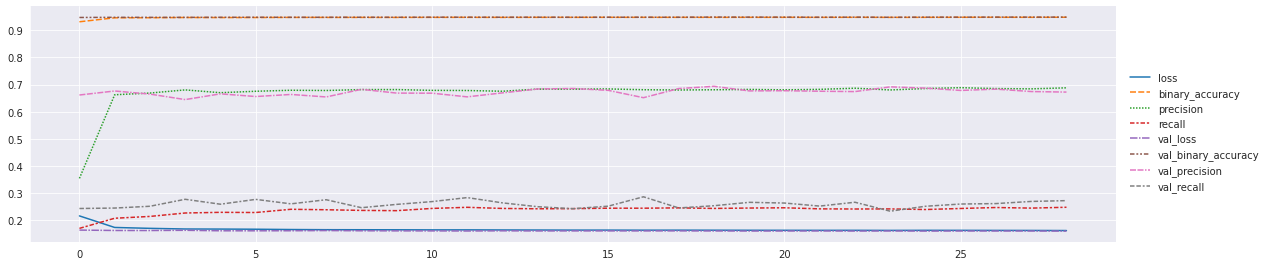

In [60]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

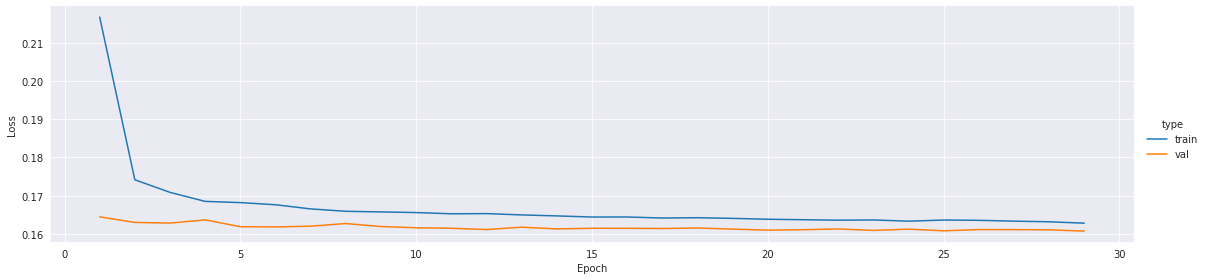

In [61]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

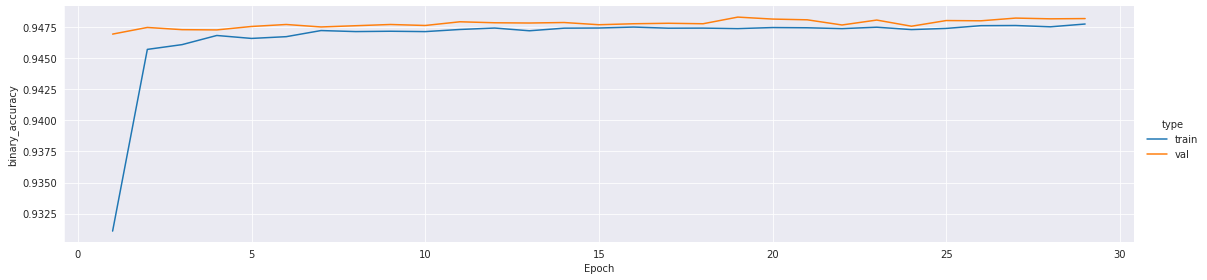

In [62]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot
plt.show()

In [64]:
model04.evaluate(X_test, Z2_test)

69/69 [==============================] - 1s 4ms/step - loss: 0.1598 - binary_accuracy: 0.9485 - precision: 0.7069 - recall: 0.2442


[0.15981818735599518,
 0.9485286474227905,
 0.7069457769393921,
 0.24416694045066833]

usin y

In [65]:
def create_Y_model(X, *, filters=(32, 64, 128), kernel_size=(5, 3, 3), strides=(1, 1, 1)):
    
    f1, f2, f3 = filters
    k1, k2, k3 = kernel_size
    s1, s2, s3 = strides
    
    X = keras.layers.Conv1D(f1, k1, strides=s1, padding='same', name='Y_conv_1')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_1')(X)
    X = keras.layers.ReLU(name='Y_relu_1')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_1')(X)

    X = keras.layers.Conv1D(f2, k2, strides=s2, padding='same', name='Y_conv_2')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_2')(X)
    X = keras.layers.ReLU(name='Y_relu_2')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_2')(X)

    X = keras.layers.Conv1D(f3, k3, strides=s3, padding='same', name='Y_conv_3')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_3')(X)
    X = keras.layers.ReLU(name='Y_relu_3')(X)

    X = keras.layers.GlobalAveragePooling1D(name='Y_aver')(X)
    X = keras.layers.Dropout(0.5, name='Y_drop')(X)

    return X

In [66]:
def create_model011(Y_shape, Z_shape):
    Y_inputs = keras.Input(Y_shape[1:], name='Y_inputs')

    X = create_Y_model(Y_inputs)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)
    
    model = keras.Model(inputs=Y_inputs, outputs=outputs, name='model01')
    return model

In [67]:
model05 = create_model011(Y_train.shape, Z2_train.shape)
model05.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model05.summary()

Model: "model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Y_inputs (InputLayer)       [(None, 1000, 12)]        0         
                                                                 
 Y_conv_1 (Conv1D)           (None, 1000, 32)          1952      
                                                                 
 Y_norm_1 (BatchNormalizatio  (None, 1000, 32)         128       
 n)                                                              
                                                                 
 Y_relu_1 (ReLU)             (None, 1000, 32)          0         
                                                                 
 Y_pool_1 (MaxPooling1D)     (None, 500, 32)           0         
                                                                 
 Y_conv_2 (Conv1D)           (None, 500, 64)           6208      
                                                           

In [68]:
MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model05.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model05.fit(Y_train, Z2_train, epochs=40, batch_size=32, callbacks=callbacks_list, validation_data=(Y_valid, Z2_valid))

model05 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/40
546/546 [==============================] - 11s 13ms/step - loss: 0.1975 - binary_accuracy: 0.9321 - precision: 0.4044 - recall: 0.2612 - val_loss: 0.1382 - val_binary_accuracy: 0.9525 - val_precision: 0.7646 - val_recall: 0.3058
Epoch 2/40
546/546 [==============================] - 7s 14ms/step - loss: 0.1478 - binary_accuracy: 0.9515 - precision: 0.7119 - recall: 0.3328 - val_loss: 0.1271 - val_binary_accuracy: 0.9551 - val_precision: 0.7590 - val_recall: 0.3733
Epoch 3/40
546/546 [==============================] - 7s 12ms/step - loss: 0.1369 - binary_accuracy: 0.9537 - precision: 0.7273 - recall: 0.3745 - val_loss: 0.1258 - val_binary_accuracy: 0.9547 - val_precision: 0.7149 - val_recall: 0.4128
Epoch 4/40
546/546 [==============================] - 8s 15ms/step - loss: 0.1311 - binary_accuracy: 0.9556 - precision: 0.7470 - recall: 0.4020 - val_loss: 0.1189 - val_binary_accuracy: 0.9574 - val_precision: 0.7537 - val_recall: 0.4342
Epoch 5/40
546/546 [=======================

In [4]:
model05 = keras.models.load_model('/content/drive/MyDrive/project/model05.keras')

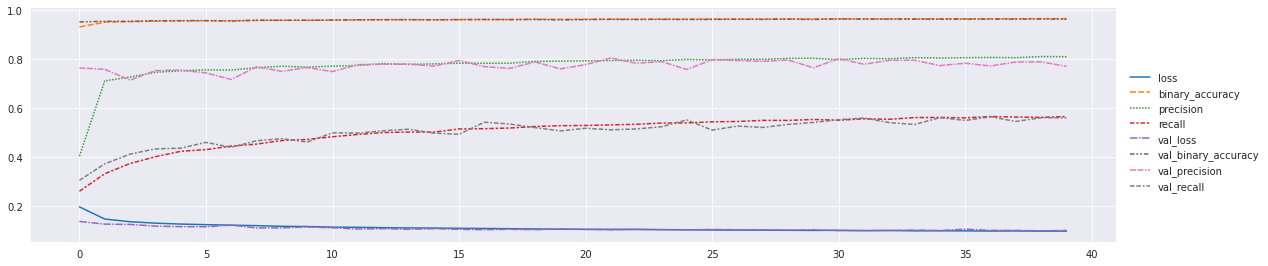

In [69]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

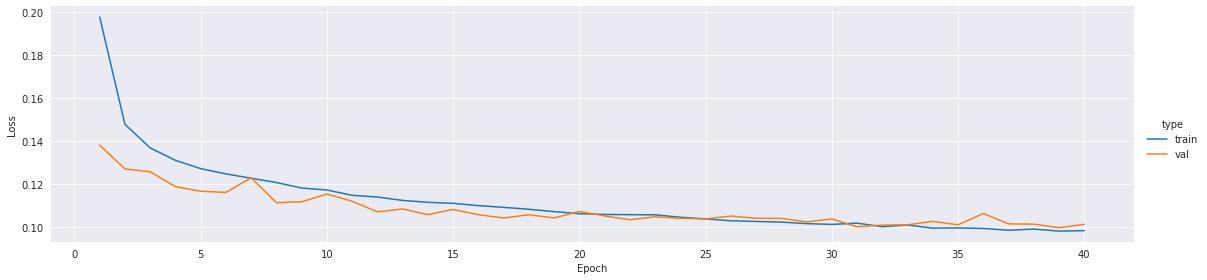

In [70]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

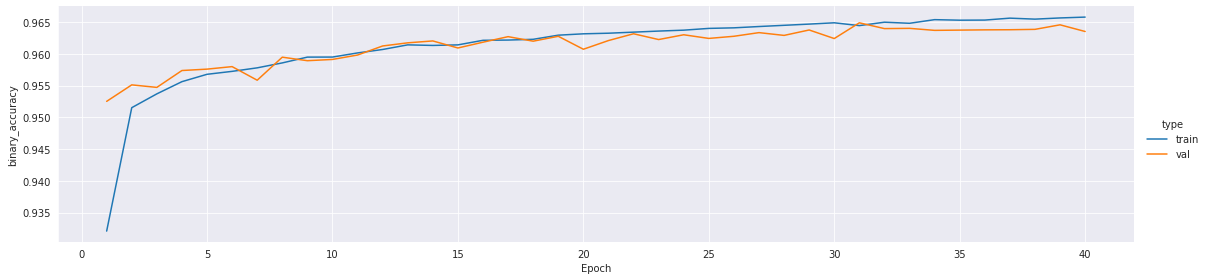

In [71]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot
plt.show()

In [16]:
model05.evaluate(Y_test, Z2_test)

69/69 [==============================] - 4s 46ms/step - loss: 0.1143 - binary_accuracy: 0.9627 - precision: 0.7682 - recall: 0.5422


[0.11428159475326538,
 0.9626792669296265,
 0.7681564092636108,
 0.5422280430793762]

# X and Y: 1D CNN Classifier

In [72]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu', name='X_dense_1')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_1')(X)
    X = keras.layers.Dense(units, activation='relu', name='X_dense_2')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_2')(X)
    
    return X

In [73]:
def create_Y_model(X, *, filters=(32, 64, 128), kernel_size=(5, 3, 3), strides=(1, 1, 1)):
    
    f1, f2, f3 = filters
    k1, k2, k3 = kernel_size
    s1, s2, s3 = strides
    
    X = keras.layers.Conv1D(f1, k1, strides=s1, padding='same', name='Y_conv_1')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_1')(X)
    X = keras.layers.ReLU(name='Y_relu_1')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_1')(X)

    X = keras.layers.Conv1D(f2, k2, strides=s2, padding='same', name='Y_conv_2')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_2')(X)
    X = keras.layers.ReLU(name='Y_relu_2')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_2')(X)

    X = keras.layers.Conv1D(f3, k3, strides=s3, padding='same', name='Y_conv_3')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_3')(X)
    X = keras.layers.ReLU(name='Y_relu_3')(X)

    X = keras.layers.GlobalAveragePooling1D(name='Y_aver')(X)
    X = keras.layers.Dropout(0.5, name='Y_drop')(X)

    return X

In [74]:
def create_model06(X_shape, Y_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:], name='X_inputs')
    Y_inputs = keras.Input(Y_shape[1:], name='Y_inputs')

    X = keras.layers.Concatenate(name='Z_concat')([create_X_model(X_inputs), create_Y_model(Y_inputs, filters=(64, 128, 256), kernel_size=(7, 3, 3))])
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)

    model = keras.Model(inputs=[X_inputs, Y_inputs], outputs=outputs, name='model02')
    return model

In [75]:
model06 = create_model06(X_train.shape, Y_train.shape, Z2_train.shape)
model06.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model06.summary()

Model: "model02"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Y_inputs (InputLayer)          [(None, 1000, 12)]   0           []                               
                                                                                                  
 Y_conv_1 (Conv1D)              (None, 1000, 64)     5440        ['Y_inputs[0][0]']               
                                                                                                  
 Y_norm_1 (BatchNormalization)  (None, 1000, 64)     256         ['Y_conv_1[0][0]']               
                                                                                                  
 Y_relu_1 (ReLU)                (None, 1000, 64)     0           ['Y_norm_1[0][0]']               
                                                                                            

In [76]:

MODEL_CHECKPOINT = '/content/drive/MyDrive/project/model06.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=20),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model06.fit([X_train, Y_train], Z2_train, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data=([X_valid, Y_valid], Z2_valid))

model06 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/100
546/546 [==============================] - 15s 18ms/step - loss: 0.1949 - binary_accuracy: 0.9328 - precision: 0.4148 - recall: 0.2698 - val_loss: 0.1459 - val_binary_accuracy: 0.9530 - val_precision: 0.7173 - val_recall: 0.3634
Epoch 2/100
546/546 [==============================] - 9s 16ms/step - loss: 0.1393 - binary_accuracy: 0.9546 - precision: 0.7471 - recall: 0.3773 - val_loss: 0.1229 - val_binary_accuracy: 0.9575 - val_precision: 0.7611 - val_recall: 0.4279
Epoch 3/100
546/546 [==============================] - 11s 19ms/step - loss: 0.1291 - binary_accuracy: 0.9577 - precision: 0.7624 - recall: 0.4359 - val_loss: 0.1178 - val_binary_accuracy: 0.9595 - val_precision: 0.7789 - val_recall: 0.4569
Epoch 4/100
546/546 [==============================] - 9s 17ms/step - loss: 0.1229 - binary_accuracy: 0.9591 - precision: 0.7689 - recall: 0.4627 - val_loss: 0.1171 - val_binary_accuracy: 0.9594 - val_precision: 0.7754 - val_recall: 0.4579
Epoch 5/100
546/546 [=================

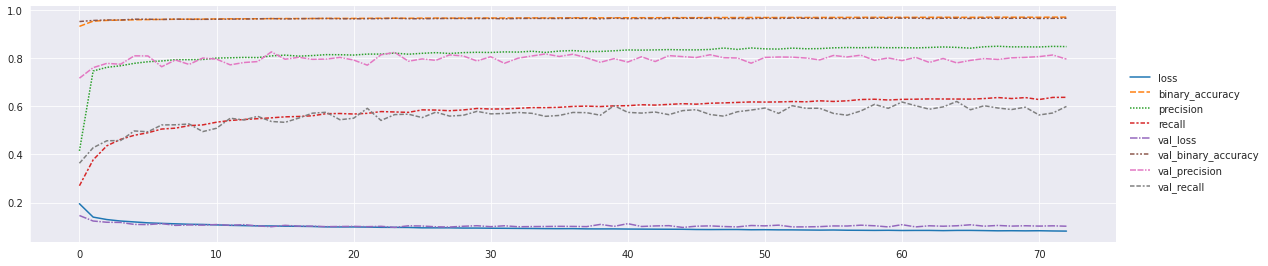

In [77]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

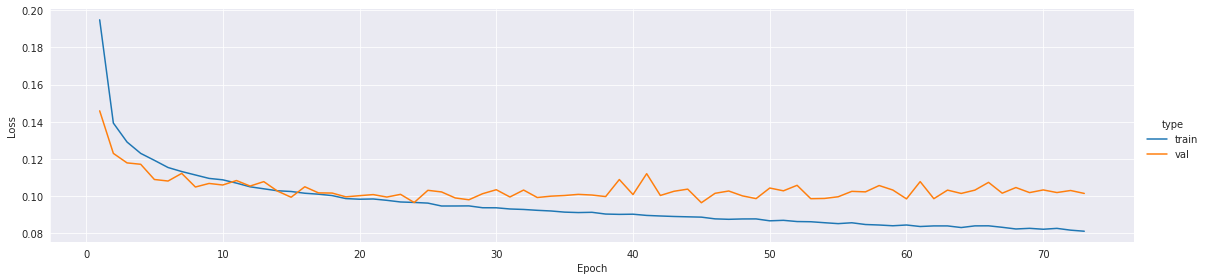

In [78]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['loss'], columns=['loss'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_loss'], columns=['loss'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='loss', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('Loss')

# Display the plot
plt.show()

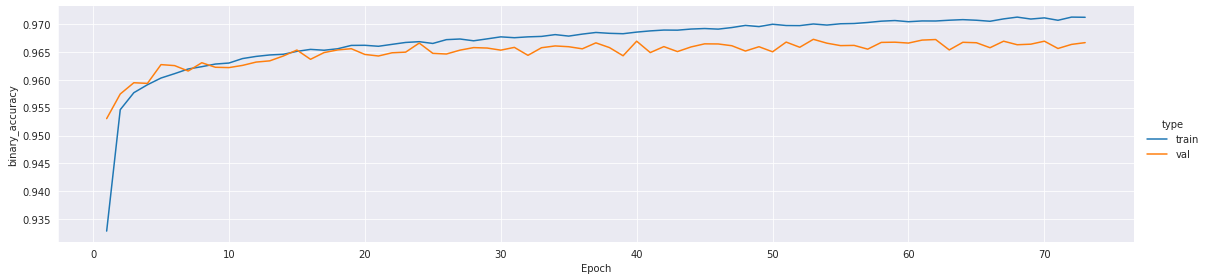

In [79]:
# Create a dataframe for the training loss
train_loss_df = pd.DataFrame(history.history['binary_accuracy'], columns=['binary_accuracy'])
train_loss_df['epoch'] = range(1, len(train_loss_df)+1)
train_loss_df['type'] = 'train'

# Create a dataframe for the validation loss
val_loss_df = pd.DataFrame(history.history['val_binary_accuracy'], columns=['binary_accuracy'])
val_loss_df['epoch'] = range(1, len(val_loss_df)+1)
val_loss_df['type'] = 'val'

# Combine the two dataframes into one
loss_df = pd.concat([train_loss_df, val_loss_df], axis=0)

# Use seaborn to plot the data
sns.relplot(data=loss_df, kind='line', height=4, aspect=4, x='epoch', y='binary_accuracy', hue='type', 
            style='type', dashes=False)

# Set the x-axis label
plt.xlabel('Epoch')

# Set the y-axis label
plt.ylabel('binary_accuracy')

# Display the plot
plt.show()

In [80]:
model06.evaluate([X_test, Y_test], Z2_test)

69/69 [==============================] - 2s 12ms/step - loss: 0.0952 - binary_accuracy: 0.9680 - precision: 0.8090 - recall: 0.6112


[0.09519603848457336,
 0.9679881930351257,
 0.8090474009513855,
 0.6112388968467712]

In [97]:
model04 = keras.models.load_model('/content/drive/MyDrive/project/model04.keras')
model05 = keras.models.load_model('/content/drive/MyDrive/project/model05.keras')
model06 = keras.models.load_model('/content/drive/MyDrive/project/model06.keras')

labels=list(dict.fromkeys(list(itertools.chain.from_iterable(ECG_df["diagnostic_subclass"].tolist()))))

Z2_test = Z2_test.astype(int)
Z_pred_04 = model04.predict(X_test).round().astype(int)
Z_pred_05 = model05.predict (Y_test).round().astype(int)
Z_pred_06 = model06.predict([X_test, Y_test]).round().astype(int)

69/69 [==============================] - 1s 6ms/step


In [98]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Class - " + class_label)

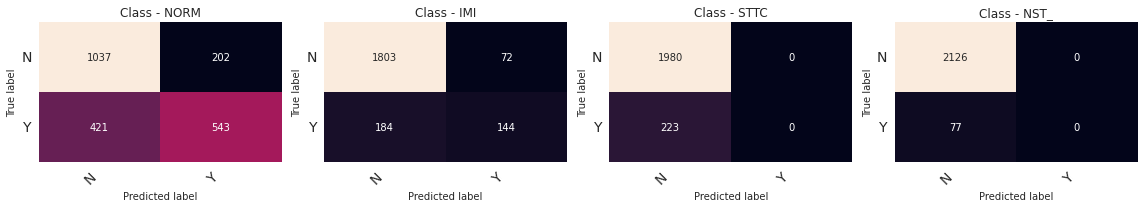

              precision    recall  f1-score   support

        NORM       0.73      0.56      0.64       964
         IMI       0.67      0.44      0.53       328
        STTC       0.00      0.00      0.00       223
        NST_       0.00      0.00      0.00        77
         LVH       0.00      0.00      0.00       214
   LAFB/LPFB       0.00      0.00      0.00       180
     RAO/RAE       0.00      0.00      0.00        10
         RVH       0.00      0.00      0.00        12
       IRBBB       0.00      0.00      0.00       112
        IVCD       0.00      0.00      0.00        79
         LMI       0.00      0.00      0.00        20
         AMI       0.62      0.18      0.28       308
        ISCA       0.00      0.00      0.00        94
        _AVB       0.00      0.00      0.00        83
        ISC_       0.00      0.00      0.00       128
       SEHYP       0.00      0.00      0.00         3
        ISCI       0.00      0.00      0.00        40
       CRBBB       0.00    

In [101]:
import sklearn.metrics
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z2_test, Z_pred_04), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z2_test, Z_pred_04, target_names=labels, zero_division=0))

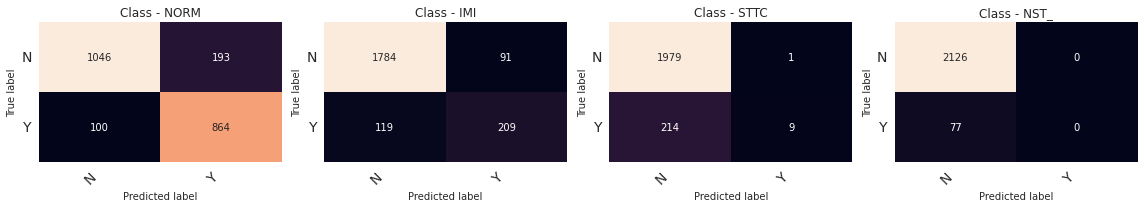

              precision    recall  f1-score   support

        NORM       0.82      0.90      0.86       964
         IMI       0.70      0.64      0.67       328
        STTC       0.90      0.04      0.08       223
        NST_       0.00      0.00      0.00        77
         LVH       0.78      0.49      0.60       214
   LAFB/LPFB       0.81      0.62      0.70       180
     RAO/RAE       0.00      0.00      0.00        10
         RVH       0.00      0.00      0.00        12
       IRBBB       0.81      0.45      0.57       112
        IVCD       0.00      0.00      0.00        79
         LMI       0.00      0.00      0.00        20
         AMI       0.81      0.62      0.71       308
        ISCA       0.00      0.00      0.00        94
        _AVB       0.00      0.00      0.00        83
        ISC_       0.73      0.50      0.59       128
       SEHYP       0.00      0.00      0.00         3
        ISCI       0.00      0.00      0.00        40
       CRBBB       0.74    

In [102]:
import sklearn.metrics
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z2_test, Z_pred_05), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z2_test, Z_pred_05, target_names=labels, zero_division=0))

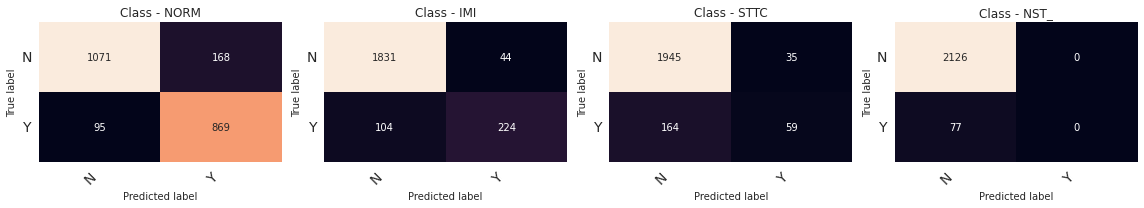

              precision    recall  f1-score   support

        NORM       0.84      0.90      0.87       964
         IMI       0.84      0.68      0.75       328
        STTC       0.63      0.26      0.37       223
        NST_       0.00      0.00      0.00        77
         LVH       0.72      0.65      0.68       214
   LAFB/LPFB       0.80      0.73      0.76       180
     RAO/RAE       0.00      0.00      0.00        10
         RVH       0.00      0.00      0.00        12
       IRBBB       0.69      0.64      0.67       112
        IVCD       0.00      0.00      0.00        79
         LMI       0.00      0.00      0.00        20
         AMI       0.89      0.66      0.76       308
        ISCA       0.00      0.00      0.00        94
        _AVB       0.00      0.00      0.00        83
        ISC_       0.68      0.55      0.61       128
       SEHYP       0.00      0.00      0.00         3
        ISCI       0.00      0.00      0.00        40
       CRBBB       0.79    

In [103]:
import sklearn.metrics
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z2_test, Z_pred_06), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z2_test, Z_pred_06, target_names=labels, zero_division=0))